In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movies=pd.read_csv('train_file_prediction.csv',sep=';')

In [3]:
liste_colonnes=list(movies.columns)
liste_colonnes.remove('imdb_score')
liste_colonnes

['color',
 'director_name',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'num_voted_users',
 'facenumber_in_poster',
 'plot_keywords',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'aspect_ratio',
 'movie_facebook_likes',
 'nombre_genres',
 'main production',
 'gross_world',
 'metascore',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [4]:
X=movies[liste_colonnes]
y=movies['imdb_score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Estimation avec Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
score = reg.score(X_test, y_test)
print(score)

0.5858586629324973


# Estimation avec SVR 


In [6]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
score = regr.score(X_test, y_test)
print(score)

0.6040947085863169


# Estimation avec KNN

In [7]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=22)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = knn.score(X_test, y_test)
print(score)

0.10445265673849802


# Estimation Random Forest Regessor

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()             
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = rf.score(X_test, y_test)
print(score)

0.6808019450917338


# Estimation avec XGBoost

In [9]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
score = xgb.score(X_test, y_test)
print(score)

0.6879977046647898


# Determination des meilleurs features

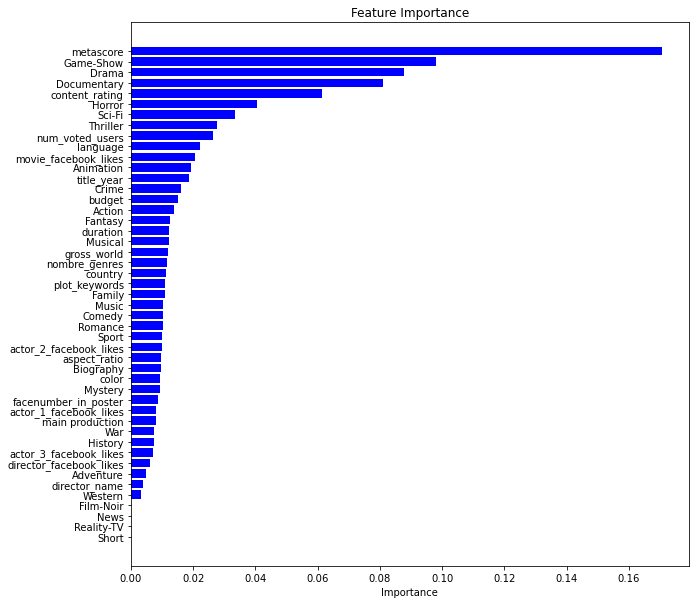

In [10]:
from sklearn.feature_selection import SelectFromModel

featureimp = pd.DataFrame()
datanew = movies.drop(['imdb_score'], axis = 1)
featureimp['columns'] = datanew.columns

featureimp['Feature_importance'] = xgb.feature_importances_
featureimp = featureimp.sort_values(by='Feature_importance', ascending=True)

#Barplot indicating Feature Importance
plt.figure(figsize=(10, 10))
plt.barh(y=featureimp['columns'], width=featureimp['Feature_importance'], color='blue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

In [11]:
features=[]
for feature in zip(liste_colonnes, xgb.feature_importances_):
    #print(feature)
    features.append(feature)
    
sorted_by_second = sorted(features, key=lambda tup: tup[1],reverse=True)
feature_list=[s[0] for s in sorted_by_second]
selection_feature=feature_list[:20]    
selection_feature

['metascore',
 'Game-Show',
 'Drama',
 'Documentary',
 'content_rating',
 'Horror',
 'Sci-Fi',
 'Thriller',
 'num_voted_users',
 'language',
 'movie_facebook_likes',
 'Animation',
 'title_year',
 'Crime',
 'budget',
 'Action',
 'Fantasy',
 'duration',
 'Musical',
 'gross_world']

In [12]:
X=movies[selection_feature]
y=movies['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
             
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
score = xgb.score(X_test, y_test)
print(score)
#Pas d'amélioration donc on garde toutes les features 
#algo tester avec entre 1 et 47 features 

0.668277990873944


In [13]:
X=movies[liste_colonnes]
y=movies['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [15]:
xgb = XGBRegressor(colsample_bytree=0.7, max_depth= 6, n_estimators= 36)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
score = xgb.score(X_test, y_test)
print(score)

0.6817994608993436


In [16]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
score = xgb.score(X_test, y_test)
print(score)

0.6879977046647898


In [17]:
y_pred

array([6.2710986, 7.0198627, 5.7473884, 6.5092397, 5.581407 , 5.8896236,
       5.2043176, 5.587491 , 4.671776 , 7.59527  , 5.1578135, 7.331965 ,
       7.640833 , 6.4391947, 7.818573 , 5.1081557, 5.8027062, 7.224532 ,
       6.078901 , 7.686798 , 8.4299345, 4.150261 , 6.2971506, 5.195284 ,
       6.685601 , 5.416592 , 5.0906034, 6.722335 , 6.443065 , 6.77205  ,
       8.076725 , 7.210621 , 4.367932 , 7.0543847, 6.5179095, 6.1829495,
       7.6134753, 6.7637167, 5.492804 , 6.645048 , 5.3452945, 5.641522 ,
       8.14993  , 5.980123 , 6.9452696, 6.1429286, 6.482669 , 5.281249 ,
       7.1595488, 7.287538 , 6.613578 , 7.866223 , 4.7834597, 4.4661684,
       6.580628 , 6.993311 , 7.375701 , 6.202327 , 7.206816 , 4.812923 ,
       5.962662 , 7.808296 , 6.6404414, 4.9484224, 6.620443 , 6.7076335,
       6.596399 , 6.719637 , 4.4916363, 6.313562 , 6.7202644, 6.121199 ,
       7.3269024, 6.329403 , 6.772292 , 7.89662  , 7.0478916, 7.878606 ,
       4.740111 , 7.339574 , 7.060934 , 6.1723404, 

In [18]:
y_pred=np.around(y_pred, decimals=1)
y_pred

array([6.3, 7. , 5.7, 6.5, 5.6, 5.9, 5.2, 5.6, 4.7, 7.6, 5.2, 7.3, 7.6,
       6.4, 7.8, 5.1, 5.8, 7.2, 6.1, 7.7, 8.4, 4.2, 6.3, 5.2, 6.7, 5.4,
       5.1, 6.7, 6.4, 6.8, 8.1, 7.2, 4.4, 7.1, 6.5, 6.2, 7.6, 6.8, 5.5,
       6.6, 5.3, 5.6, 8.1, 6. , 6.9, 6.1, 6.5, 5.3, 7.2, 7.3, 6.6, 7.9,
       4.8, 4.5, 6.6, 7. , 7.4, 6.2, 7.2, 4.8, 6. , 7.8, 6.6, 4.9, 6.6,
       6.7, 6.6, 6.7, 4.5, 6.3, 6.7, 6.1, 7.3, 6.3, 6.8, 7.9, 7. , 7.9,
       4.7, 7.3, 7.1, 6.2, 7.4, 7.2, 5.9, 5.3, 5.2, 5.6, 6.3, 6.8, 6.6,
       6. , 7.7, 7.4, 7.7, 8.5, 6.2, 5. , 6.6, 4.8, 6.5, 6.4, 6.4, 5.7,
       5.6, 5.3, 7.5, 6.1, 7.2, 5.4, 4.8, 6.6, 7.4, 5.5, 3.9, 6.6, 5.5,
       5.8, 6. , 6.4, 7.7, 7.2, 5.9, 5.2, 6.9, 7.6, 5.9, 7.2, 6.4, 8.8,
       6.2, 7.1, 6. , 3.8, 6.4, 6.5, 4.4, 7.7, 5.3, 6.7, 5.5, 6.1, 7.7,
       6.5, 5. , 7.4, 6. , 6.3, 7. , 5.1, 6.4, 5.8, 6.3, 7. , 7.6, 8.3,
       6.5, 6.7, 6.4, 6.3, 6.6, 6.9, 4.8, 7.7, 7. , 6.9, 5.9, 7.3, 7.3,
       7.2, 6.4, 7.4, 6.3, 8.4, 7.4, 6.9, 7.8, 5.6, 7.5, 6.2, 6.

<function matplotlib.pyplot.show(close=None, block=None)>

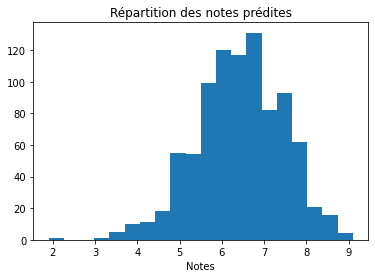

In [21]:
plt.hist(y_pred,bins=20)
plt.title("Répartition des notes prédites")
plt.xlabel("Notes")
plt.show